In [1]:
import pandas as pd
import numpy as np

In [3]:
sim_id = 4002
columns = ['Time', 'Lyapunov Time']
for i in ['1', '2', '3']:
    columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]
            
filename = '../data/featuresfromshortruns/output'+str(sim_id)+'.csv'
run = pd.read_csv(filename, names=columns)
#dfrow = df.loc[sim_id]
run.head()

,Time,Lyapunov Time,a1,P1,e1,pomega1,inc1,Omega1,f1,a2,...,inc2,Omega2,f2,a3,P3,e3,pomega3,inc3,Omega3,f3
0,0.000000,inf,0.058207,0.014043,0.016177,0.160822,0.013167,-1.598843,0.400466,0.067948,...,0.000755,-0.032242,-4.443158,0.080430,0.022809,0.005911,0.205466,0.008275,-1.236247,-2.807517
1,0.070249,-0.398079,0.058193,0.014038,0.017757,0.207567,0.013140,-1.603239,0.369809,0.067977,...,0.000822,-0.065324,1.566302,0.080419,0.022805,0.005093,0.071908,0.008271,-1.237515,-2.173357
2,0.140499,-3.068073,0.058181,0.014033,0.018849,0.176664,0.013146,-1.604756,0.431836,0.068000,...,0.000839,-0.058530,-4.885182,0.080412,0.022802,0.005201,0.047581,0.008273,-1.237491,-1.646443
3,0.210748,44.047492,0.058181,0.014034,0.018694,0.132399,0.013143,-1.607485,0.513211,0.067979,...,0.000890,-0.061591,-5.124170,0.080435,0.022812,0.006047,0.191105,0.008264,-1.239215,-1.286663
4,0.280997,17.112414,0.058193,0.014038,0.017421,0.106476,0.013129,-1.609453,0.569348,0.067968,...,0.000926,-0.076849,-5.122104,0.080428,0.022809,0.005506,0.046690,0.008258,-1.240278,-0.631678


In [4]:
run[["inc1", "inc2", "inc3"]].std(axis=1).mean()

0.0038900938612450951

In [5]:
run["inc1"].std()

0.0037679484717016982

In [35]:
def avg(feature): # pass string for feature, e.g., 'a1' and returns a function that returns the average of that feature
    def avg_feat():
        return run[feature].mean()
    avg_feat.__name__ = 'avg_'+feature
    return avg_feat

def std(feature): # returns function that returns standard deviation of feature
    def std_feat():
        return run[feature].std()
    std_feat.__name__ = 'std_'+feature
    return std_feat

def maximum(feature): # returns function that returns maximum 
    def max_feat():
        return run[feature].max()
    max_feat.__name__ = 'max_'+feature
    return max_feat

def minimum(feature): # returns function that returns minimum
    def min_feat():
        return run[feature].min()
    min_feat.__name__ = 'min_'+feature
    return min_feat

def norm_std(feature): # returns function that returns standard deviation of feature, normalized to the mean of the feature
    def norm_std_feat():
        return run[feature].std()/run[feature].mean()
    norm_std_feat.__name__ = 'norm_std_'+feature
    return norm_std_feat

def norm_maximum(feature): # returns function that returns absolute value of maximum deviation from mean, normalized to mean
    def norm_max_feat():
        return np.abs(run[feature] - run[feature].mean()).max()/run[feature].mean()
    norm_max_feat.__name__ = 'norm_max_'+feature
    return norm_max_feat

def norm_std_window(feature, Nsamples): # returns function that returns standard deviation of feature, normalized to the mean of the feature, only taking the first Nsamples
    def norm_std_window_feat():
        sample = run[feature][:Nsamples]
        return sample.std()/sample.mean()
    norm_std_window_feat.__name__ = 'norm_std_window'+str(Nsamples)+'_'+feature
    return norm_std_window_feat

def norm_maximum_window(feature, Nsamples): # returns function that returns absolute value of maximum deviation from mean, normalized to mean, only taking the first Nsamples
    def norm_max_window_feat():
        sample = run[feature][:Nsamples]
        return np.abs(sample - sample.mean()).max()/sample.mean()
    norm_max_window_feat.__name__ = 'norm_max_window'+str(Nsamples)+'_'+feature
    return norm_max_window_feat

def norm_LyapunovTime(): # returns last value for the Lyapunov time, normalized to inner (initial) orbital period
    length = run['Lyapunov Time'].shape[0]
    return run['Lyapunov Time'][length-1]/run['P1'][0]

def avg_eH1():
    return run["e1"].mean()/dfrow["RH/a"]

def avg_eH2():
    return run["e2"].mean()/dfrow["RH/a"]

def avg_eH3():
    return run["e3"].mean()/dfrow["RH/a"]

def avg_ecross1():
    return run["e1"].mean()/dfrow["daOvera1"]

def avg_ecross2():
    return run["e2"].mean()/dfrow["mindaOvera"]

def avg_ecross3():
    return run["e3"].mean()/dfrow["daOvera2"]

def std_eH1():
    return run["e1"].std()/dfrow["RH/a"]

def std_eH2():
    return run["e2"].std()/dfrow["RH/a"]

def std_eH3():
    return run["e3"].std()/dfrow["RH/a"]

def std_ecross1():
    return run["e1"].std()/dfrow["daOvera1"]

def std_ecross2():
    return run["e2"].std()/dfrow["mindaOvera"]

def std_ecross3():
    return run["e3"].std()/dfrow["daOvera2"]

def max_eH1():
    return run["e1"].max()/dfrow["RH/a"]

def max_eH2():
    return run["e2"].max()/dfrow["RH/a"]

def max_eH3():
    return run["e3"].max()/dfrow["RH/a"]

def max_ecross1():
    return run["e1"].max()/dfrow["daOvera1"]

def max_ecross2():
    return run["e2"].max()/dfrow["mindaOvera"]

def max_ecross3():
    return run["e3"].max()/dfrow["daOvera2"]

def min_eH1():
    return run["e1"].min()/dfrow["RH/a"]

def min_eH2():
    return run["e2"].min()/dfrow["RH/a"]

def min_eH3():
    return run["e3"].min()/dfrow["RH/a"]

def min_ecross1():
    return run["e1"].min()/dfrow["daOvera1"]

def min_ecross2():
    return run["e2"].min()/dfrow["mindaOvera"]

def min_ecross3():
    return run["e3"].min()/dfrow["daOvera2"]

def std_iH1():
    return run["inc1"].std()/dfrow["RH/a"]

def std_iH2():
    return run["inc2"].std()/dfrow["RH/a"]

def std_iH3():
    return run["inc3"].std()/dfrow["RH/a"]

def max_iH1():
    return run["inc1"].max()/dfrow["RH/a"]

def max_iH2():
    return run["inc2"].max()/dfrow["RH/a"]

def max_iH3():
    return run["inc3"].max()/dfrow["RH/a"]

def min_iH1():
    return run["inc1"].min()/dfrow["RH/a"]

def min_iH2():
    return run["inc2"].min()/dfrow["RH/a"]

def min_iH3():
    return run["inc3"].min()/dfrow["RH/a"]

def mean_std_iH():
    return run[["inc1", "inc2", "inc3"]].std(axis=1).mean()/dfrow["RH/a"]

def norm_a1_slope():
    xx = range(run["a1"].shape[0])
    yy = run["a1"]/run["a1"].mean()/run["Time"].iloc[-1]
    par = np.polyfit(xx, yy, 1, full=True)
    slope, intercept = par[0][0], par[0][1]
    return slope

def norm_a2_slope():
    xx = range(run["a2"].shape[0])
    yy = run["a2"]/run["a2"].mean()/run["Time"].iloc[-1]
    par = np.polyfit(xx, yy, 1, full=True)
    slope, intercept = par[0][0], par[0][1]
    return slope

def norm_a3_slope():
    xx = range(run["a3"].shape[0])
    yy = run["a3"]/run["a3"].mean()/run["Time"].iloc[-1]
    par = np.polyfit(xx, yy, 1, full=True)
    slope, intercept = par[0][0], par[0][1]
    return slope

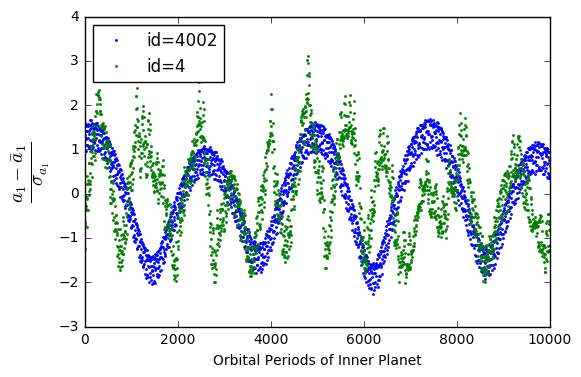

In [53]:
#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
sim_id=[4002,4]
for i in sim_id:
    filename = '../data/featuresfromshortruns/output'+str(i)+'.csv'
    run = pd.read_csv(filename, names=columns)
    #yy = (run["a1"] - run["a1"].mean())/run["a1"].std()
    yy = (run["e1"] - run["e1"].mean())/run["e1"].std()
    plt.plot(run["Time"]/run["P1"][0],yy,'.',ms=3,label='id=%d'%i)
plt.ylabel(r'$\frac{a_1 - \bar{a}_{1}}{\sigma_{a_1}}$',fontsize=20)
plt.xlabel('Orbital Periods of Inner Planet')
plt.legend(loc='upper left',numpoints=1)
plt.savefig("shortI_a.png")

In [59]:
featurelist = []

'''
for f in ['a1', 'a2', 'a3', 'e1', 'e2', 'e3']:
    featurelist.append(avg(f))
    featurelist.append(std(f))
    featurelist.append(maximum(f))
    featurelist.append(minimum(f))
    featurelist.append(norm_std(f))
    featurelist.append(norm_maximum(f))
    featurelist.append(norm_std_window(f, 10))
    featurelist.append(norm_maximum_window(f, 10))
'''

'''
    for f in ['inc1', 'inc2', 'inc3']:
    featurelist.append(norm_std(f))
    featurelist.append(norm_maximum(f))
    featurelist.append(norm_std_window(f, 10))
    featurelist.append(norm_maximum_window(f, 10))

featurelist = featurelist + [norm_LyapunovTime, avg_eH1, avg_eH2, avg_eH3, avg_ecross1, avg_ecross2, avg_ecross3]
featurelist = featurelist + [std_eH1, std_eH2, std_eH3, std_ecross1, std_ecross2, std_ecross3]
featurelist = featurelist + [max_eH1, max_eH2, max_eH3, max_ecross1, max_ecross2, max_ecross3]
featurelist = featurelist + [min_eH1, min_eH2, min_eH3, min_ecross1, min_ecross2, min_ecross3]
featurelist = featurelist + [std_iH1, std_iH2, std_iH3, max_iH1, max_iH2, max_iH3, min_iH1, min_iH2, min_iH3]
featurelist = featurelist + [mean_std_iH, norm_a1_slope, norm_a2_slope, norm_a3_slope]
'''
   
featurenames = [f.__name__ for f in featurelist]
print("Features that will be added = {0}".format(featurenames))


Features that will be added = ['norm_min_a1', 'norm_min_window10_a1', 'norm_min_a2', 'norm_min_window10_a2', 'norm_min_a3', 'norm_min_window10_a3', 'norm_min_e1', 'norm_min_window10_e1', 'norm_min_e2', 'norm_min_window10_e2', 'norm_min_e3', 'norm_min_window10_e3', 'norm_min_inc1', 'norm_min_window10_inc1', 'norm_min_inc2', 'norm_min_window10_inc2', 'norm_min_inc3', 'norm_min_window10_inc3']


In [60]:
df = pd.read_csv('../data/1e7data_train.csv', index_col=0)
dftest = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)

In [61]:
for name in featurenames:
    df[name] = 0
df.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2414,True,1.000000e+07,10000000.0,0.000015,0.021544,0.056553,0.013449,0.008127,-4.462116,0.003942,...,0,0,0,0,0,0,0,0,0,0
4056,False,2.980163e+04,10000000.0,0.000015,0.021544,0.050793,0.011447,0.005201,4.606446,0.009269,...,0,0,0,0,0,0,0,0,0,0
4855,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053113,0.012241,0.004883,0.605644,0.000564,...,0,0,0,0,0,0,0,0,0,0
517,True,1.000000e+07,10000000.0,0.000015,0.021544,0.056243,0.013338,0.008056,1.245784,0.007544,...,0,0,0,0,0,0,0,0,0,0
1520,False,2.241913e+04,10000000.0,0.000015,0.021544,0.048262,0.010603,0.012062,-0.577740,0.005068,...,0,0,0,0,0,0,0,0,0,0


In [62]:
columns = ['Time', 'Lyapunov Time']
for i in ['1', '2', '3']:
    columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

In [63]:
sim_ids = df.index.values
for i, sim_id in enumerate(sim_ids):
    print("{0}/{1}".format(i, df.index.values.shape[0]))
    filename = '/mnt/raid-cita/dtamayo/Stability/data/featuresfromshortruns/output'+str(sim_id)+'.csv'
    run = pd.read_csv(filename, names=columns) # dataframe of outputs from short run
    dfrow = df.loc[sim_id] # row in the dataframe with all the features generated so far
    for feature in featurelist:
        df.loc[sim_id, feature.__name__] = feature()

0/3500
1/3500
2/3500
3/3500
4/3500
5/3500
6/3500
7/3500
8/3500
9/3500
10/3500
11/3500
12/3500
13/3500
14/3500
15/3500
16/3500
17/3500
18/3500
19/3500
20/3500
21/3500
22/3500
23/3500
24/3500
25/3500
26/3500
27/3500
28/3500
29/3500
30/3500
31/3500
32/3500
33/3500
34/3500
35/3500
36/3500
37/3500
38/3500
39/3500
40/3500
41/3500
42/3500
43/3500
44/3500
45/3500
46/3500
47/3500
48/3500
49/3500
50/3500
51/3500
52/3500
53/3500
54/3500
55/3500
56/3500
57/3500
58/3500
59/3500
60/3500
61/3500
62/3500
63/3500
64/3500
65/3500
66/3500
67/3500
68/3500
69/3500
70/3500
71/3500
72/3500
73/3500
74/3500
75/3500
76/3500
77/3500
78/3500
79/3500
80/3500
81/3500
82/3500
83/3500
84/3500
85/3500
86/3500
87/3500
88/3500
89/3500
90/3500
91/3500
92/3500
93/3500
94/3500
95/3500
96/3500
97/3500
98/3500
99/3500
100/3500
101/3500
102/3500
103/3500
104/3500
105/3500
106/3500
107/3500
108/3500
109/3500
110/3500
111/3500
112/3500
113/3500
114/3500
115/3500
116/3500
117/3500
118/3500
119/3500
120/3500
121/3500
122/3500
123

In [64]:
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4465,True,1.000000e+07,10000000.0,0.000015,0.021544,0.049234,0.010924,0.011821,2.166832,0.011453,...,0.000584,0.025326,0.000058,0.010939,0.000067,0.000212,0.000205,0.001258,0.002236,0.004439
4231,False,5.556366e+05,10000000.0,0.000015,0.021544,0.043888,0.009194,0.004916,-1.426257,0.007699,...,0.000374,0.155129,0.000066,0.002199,0.000106,0.000375,0.000007,0.034136,0.000070,0.000463
487,False,1.955824e+06,10000000.0,0.000015,0.021544,0.056372,0.013384,0.006294,-0.410190,0.003253,...,0.000039,0.023756,0.000583,0.002526,0.000630,0.003254,0.000256,0.000608,0.000759,0.000256
2210,False,4.607903e+03,10000000.0,0.000015,0.021544,0.054535,0.012735,0.007372,-1.748617,0.015612,...,0.000702,0.005107,0.000400,0.006366,0.005785,0.000889,0.000212,0.000663,0.000126,0.000314
4390,True,1.000000e+07,10000000.0,0.000015,0.021544,0.042994,0.008915,0.009054,2.988464,0.013263,...,0.000565,0.008115,0.000088,0.010731,0.000342,0.000861,0.000082,0.001282,0.000835,0.000491


In [65]:
for name in featurenames:
    dftest[name] = 0
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0,0,0,0,0,0,0,0,0,0
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0,0,0,0,0,0,0,0,0,0
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0,0,0,0,0,0,0,0,0,0
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0,0,0,0,0,0,0,0,0,0
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0,0,0,0,0,0,0,0,0,0


In [66]:
sim_ids = dftest.index.values
for i, sim_id in enumerate(sim_ids):
    print("{0}/{1}".format(i, dftest.index.values.shape[0]))
    filename = '/mnt/raid-cita/dtamayo/Stability/data/featuresfromshortruns/output'+str(sim_id)+'.csv'
    run = pd.read_csv(filename, names=columns) # dataframe of outputs from short run
    dfrow = dftest.loc[sim_id] # row in the dataframe with all the features generated so far
    for feature in featurelist:
        dftest.loc[sim_id, feature.__name__] = feature()

0/1500
1/1500
2/1500
3/1500
4/1500
5/1500
6/1500
7/1500
8/1500
9/1500
10/1500
11/1500
12/1500
13/1500
14/1500
15/1500
16/1500
17/1500
18/1500
19/1500
20/1500
21/1500
22/1500
23/1500
24/1500
25/1500
26/1500
27/1500
28/1500
29/1500
30/1500
31/1500
32/1500
33/1500
34/1500
35/1500
36/1500
37/1500
38/1500
39/1500
40/1500
41/1500
42/1500
43/1500
44/1500
45/1500
46/1500
47/1500
48/1500
49/1500
50/1500
51/1500
52/1500
53/1500
54/1500
55/1500
56/1500
57/1500
58/1500
59/1500
60/1500
61/1500
62/1500
63/1500
64/1500
65/1500
66/1500
67/1500
68/1500
69/1500
70/1500
71/1500
72/1500
73/1500
74/1500
75/1500
76/1500
77/1500
78/1500
79/1500
80/1500
81/1500
82/1500
83/1500
84/1500
85/1500
86/1500
87/1500
88/1500
89/1500
90/1500
91/1500
92/1500
93/1500
94/1500
95/1500
96/1500
97/1500
98/1500
99/1500
100/1500
101/1500
102/1500
103/1500
104/1500
105/1500
106/1500
107/1500
108/1500
109/1500
110/1500
111/1500
112/1500
113/1500
114/1500
115/1500
116/1500
117/1500
118/1500
119/1500
120/1500
121/1500
122/1500
123

In [67]:
dftest.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
3189,True,1.000000e+07,10000000.0,0.000015,0.021544,0.058617,0.014192,0.015881,-2.477519,0.014474,...,0.000729,0.008062,0.000085,0.024593,0.000107,0.000610,0.000093,0.001062,0.000214,8.957564e-07
468,False,2.712704e+04,10000000.0,0.000015,0.021544,0.059914,0.014665,0.003740,-2.241450,0.006668,...,0.000555,0.056411,0.000001,0.090411,0.000205,0.000846,0.000088,0.001346,0.000611,5.623516e-04
1581,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053190,0.012267,0.009476,2.538135,0.012662,...,0.000048,0.031199,0.000106,0.005515,0.000466,0.000243,0.000099,0.003004,0.000554,1.450827e-03
3484,False,6.276198e+06,10000000.0,0.000015,0.021544,0.053380,0.012333,0.012028,-5.486679,0.017237,...,0.000272,0.000539,0.000032,0.016502,0.000156,0.001146,0.000093,0.002320,0.000223,7.816216e-04
1050,False,2.954313e+05,10000000.0,0.000015,0.021544,0.046440,0.010008,0.006941,-1.087950,0.015286,...,0.000137,0.003373,0.000049,0.010093,0.000490,0.000791,0.000432,0.001049,0.001139,4.961096e-03


In [110]:
def daOvera1(sim):
    return (sim['a2']-sim['a1'])/sim['a1']

def daOvera2(sim):
    return (sim['a3']-sim['a2'])/sim['a2']

def daOverRH1(sim):
    return sim['daOvera1']/sim['RH/a']

def daOverRH2(sim):
    return sim['daOvera2']/sim['RH/a']

def mindaOvera(sim):
    return min(sim['daOvera1'], sim['daOvera2'])

def maxdaOvera(sim):
    return max(sim['daOvera1'], sim['daOvera2'])

def mindaOverRH(sim):
    return min(sim['daOverRH1'], sim['daOverRH2'])

def maxdaOverRH(sim):
    return max(sim['daOverRH1'], sim['daOverRH2'])

In [121]:
runfeaturelist = [daOvera1, daOvera2, daOverRH1, daOverRH2, mindaOvera, maxdaOvera, mindaOverRH, maxdaOverRH]
for feature in runfeaturelist:
    df = pd.concat([df, df.apply(feature, axis=1).rename(feature.__name__)], axis=1)

In [127]:
print("Features to be added = {0}".format([feature.__name__ for feature in runfeaturelist]))

Features to be added = ['daOvera1', 'daOvera2', 'daOverRH1', 'daOverRH2', 'mindaOvera', 'maxdaOvera', 'mindaOverRH', 'maxdaOverRH']


In [122]:
df.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_std_window10_e3,norm_max_window10_e3,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2414,True,1.000000e+07,10000000.0,0.000015,0.021544,0.056553,0.013449,0.008127,-4.462116,0.003942,...,0.114586,0.196496,0.193670,0.150145,8.989360,6.969123,0.150145,0.193670,6.969123,8.989360
4056,False,2.980163e+04,10000000.0,0.000015,0.021544,0.050793,0.011447,0.005201,4.606446,0.009269,...,0.240935,0.389639,0.127645,0.109779,5.924768,5.095487,0.109779,0.127645,5.095487,5.924768
4855,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053113,0.012241,0.004883,0.605644,0.000564,...,0.069629,0.086331,0.156020,0.180944,7.241825,8.398691,0.156020,0.180944,7.241825,8.398691
517,True,1.000000e+07,10000000.0,0.000015,0.021544,0.056243,0.013338,0.008056,1.245784,0.007544,...,0.030994,0.051202,0.190471,0.192685,8.840869,8.943640,0.190471,0.192685,8.840869,8.943640
1520,False,2.241913e+04,10000000.0,0.000015,0.021544,0.048262,0.010603,0.012062,-0.577740,0.005068,...,0.075764,0.127401,0.127295,0.109568,5.908519,5.085694,0.109568,0.127295,5.085694,5.908519


In [123]:
for feature in runfeaturelist:
    dftest = pd.concat([dftest, dftest.apply(feature, axis=1).rename(feature.__name__)], axis=1)

In [124]:
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_std_window10_e3,norm_max_window10_e3,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.236713,0.336729,0.148209,0.153647,6.879240,7.131643,0.148209,0.153647,6.879240,7.131643
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.132747,0.201569,0.183061,0.115718,8.496936,5.371167,0.115718,0.183061,5.371167,8.496936
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.442545,0.800100,0.146990,0.125499,6.822671,5.825163,0.125499,0.146990,5.825163,6.822671
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.172514,0.314051,0.109718,0.131489,5.092680,6.103170,0.109718,0.131489,5.092680,6.103170
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.274968,0.328780,0.192353,0.111740,8.928228,5.186531,0.111740,0.192353,5.186531,8.928228


In [68]:
df.to_csv('../data/1e7data_train.csv', encoding='ascii')
dftest.to_csv('../data/1e7data_holdout.csv', encoding='ascii')